<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA2 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook we are to learn about Naïve Bayes and how we can use it to classify. We are given a dataset of pictures and we have to determine which number each picture corresponds.

# Part.1 - Analyzing and Preprocessing Datas
First we have to process our data which are in `data.pkl` and corresponding label is in `label.pkl`.

#### Q1. Divide the data into two groups of train and test. explain their size ratio.
Dividing the data into training and testing sets is an important step in machine learning to evaluate the performance of a model on unseen data. A common ratio for splitting the data is 80:20 or 70:30, where the larger portion is used for training and the smaller portion is used for testing. In this case, I will use an 80:20 ratio, where 80% of the data will be used for training and 20% will be used for testing.
#### Q2. Show image of some samples, what are the range of each pixel?
The images are grayscale, meaning that each pixel has a single intensity value ranging from 0 to 255. A pixel with a value of 0 represents black, while a pixel with a value of 255 represents white. The values in between represent different shades of gray.
#### Q3. Since image sizes are not compatible them resize them to $20 \times 20$ pixels. Illustrate reasons to do so.
Resizing the images is not strictly necessary for training a Naive Bayes classifier, but it can be beneficial for several reasons.

First, resizing the images can reduce the computational complexity of the problem. Resizing the images to a smaller size, such as 20x20 pixels, reduces the number of parameters that need to be estimated, which can make the problem more tractable.

Second, resizing the images can improve the performance of the classifier. Naive Bayes classifiers assume that the features are independent and identically distributed (i.i.d.), which means that each pixel in the image is treated as a separate feature. However, neighboring pixels in an image are often highly correlated, which violates the i.i.d. assumption. Resizing the images can help to reduce the correlation between neighboring pixels, which can improve the performance of the classifier.

Finally, resizing the images can help to reduce the impact of small variations in the position or orientation of the digits. Resizing the images to a standard size can help to reduce the impact of these variations, which can make the classifier more robust to changes in the input.

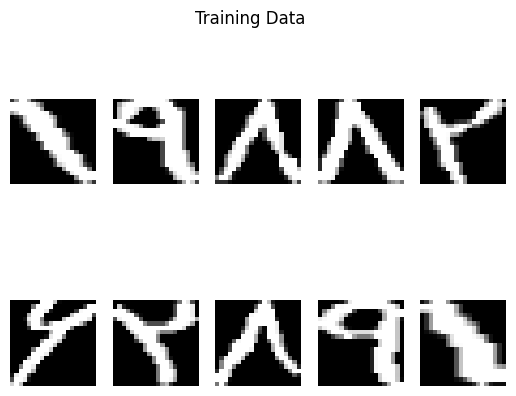

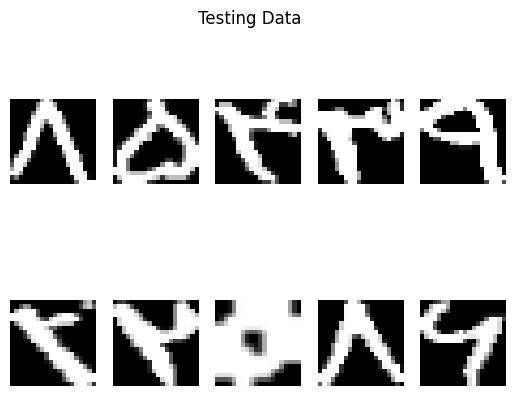

In [72]:
from __future__ import annotations
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix

with open("./assets/data.pkl", "rb") as f:
    data = pickle.load(f)

with open("./assets/label.pkl", "rb") as f:
    labels = pickle.load(f)

data_resized = [cv2.resize(img, (20, 20)) for img in data]

num_samples = len(data_resized)
num_train = int(0.8 * num_samples)
indices = list(range(num_samples))
random.shuffle(indices)
train_indices = indices[:num_train]
test_indices = indices[num_train:]
train_data = [data_resized[i] for i in train_indices]
test_data = [data_resized[i] for i in test_indices]
train_labels = [labels[i] for i in train_indices]
test_labels = [labels[i] for i in test_indices]

num_samples = 10
samples = random.sample(train_data, num_samples)
for i, sample in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample, cmap="gray")
    plt.axis("off")
    
plt.suptitle("Training Data")
plt.show()

num_samples = 10
samples = random.sample(test_data, num_samples)
for i, sample in enumerate(samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample, cmap="gray")
    plt.axis("off")
    
plt.suptitle("Testing Data")
plt.show()


#### Q4. Show sample of each class.

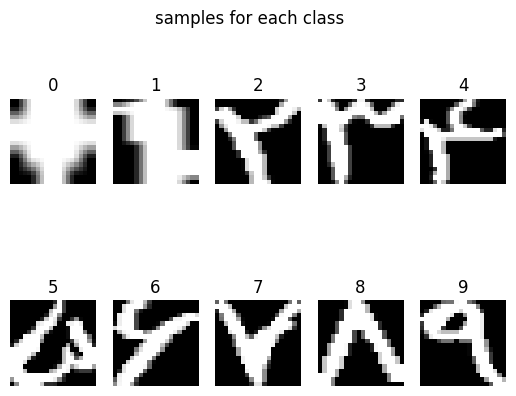

In [73]:
CLASSES = range(10)
for i in CLASSES:
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_data[train_labels.index(i)], cmap="gray")
    plt.axis("off")
    plt.title(f"{i}")

plt.suptitle("samples for each class")
plt.show()


#### Q5. Count number of recurrence of each class and show bar graph.

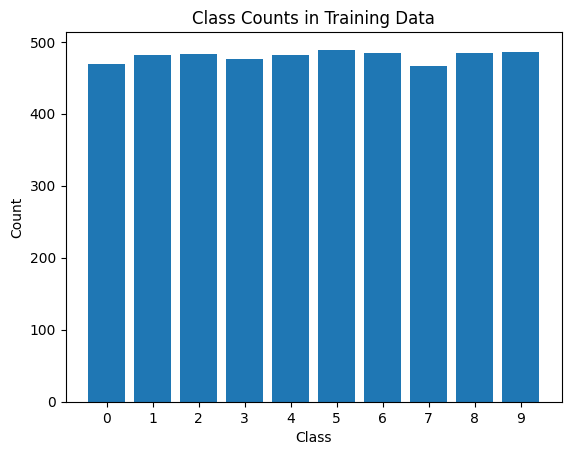

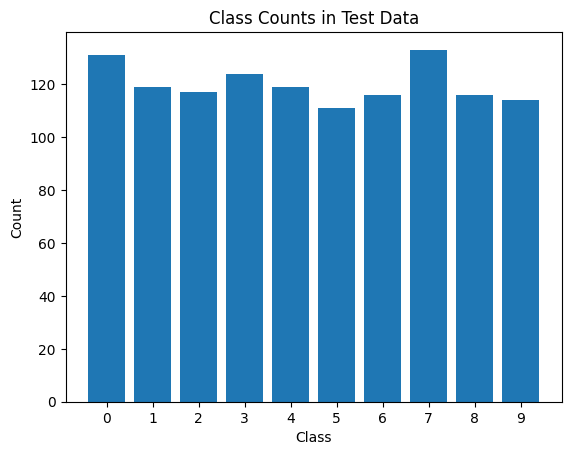

In [74]:
class_counts = np.zeros(10)
for class_ in train_labels:
    class_counts[class_] += 1

# Plot a bar graph of the class counts
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in Training Data")
plt.show()


class_counts = np.zeros(10)
for class_ in test_labels:
    class_counts[class_] += 1

# Plot a bar graph of the class counts
plt.bar(range(10), class_counts)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts in Test Data")
plt.show()


#### Q6. Scale each pixel so it is between 0 and 1. What happens if you don't?
If we don't scale the pixel values to be between 0 and 1, several issues may arise:

1. Slow convergence: If the pixel values are not scaled, the optimization algorithm may take longer to converge to the optimal solution. This is because the scale of the pixel values can affect the step size of the optimization algorithm, and if the step size is too large or too small, the algorithm may not converge quickly.

2. Poor performance: If the pixel values are not scaled, the model may not perform as well as it could. This is because the scale of the pixel values can affect the importance of different features in the model. If some features have much larger values than others, they may dominate the model and make it difficult for the model to learn from the other features.

3. Numerical instability: If the pixel values are not scaled, numerical instability can occur. This is because the range of the pixel values can be very large, which can cause numerical overflow or underflow in the computations. This can lead to incorrect results or even crashes.

In summary, scaling the pixel values to be between 0 and 1 is an important preprocessing step that can help to avoid these issues and improve the performance of the model.

In [75]:
train_data = [[i / 255 for i in row] for row in train_data]
test_data = [[i / 255 for i in row] for row in test_data]
# A better way to do this is to use the
# sklearn.preprocessing.MinMaxScaler() 
# but we are not allowed to do that


# Part.2 - Problem Solution Process
### Bayes' Theorem  
#### Q7. Explain Bayes theorem and determine what each part represents.
In the Naive Bayes model, we compute the probability of a sample belonging to a particular class `c` given its features `X` using Bayes' theorem:

$$
P(c|X) = \frac{P(X|c)P(c)}{P(X)}
$$

where `P(X|c)` is the likelihood of observing the features `X` given that the sample belongs to class `c`, `P(c)` is the prior probability of class `c`, and `P(X)` is the marginal probability of observing the features `X`.

In practice, computing `P(X)` can be difficult or impossible, especially if the number of features is large. To simplify the computation, we can use the Naive Bayes assumption, which assumes that the features are conditionally independent given the class label:

$$
P(X|c) = \prod_{i=1}^{n} P(x_i|c)
$$

where `x_i` is the `i`-th feature of `X`.

Using this assumption, we can rewrite Bayes' theorem as:

$$
P(c|X) = \frac{P(c) \prod_{i=1}^{n} P(x_i|c)}{P(X)}
$$

where `P(X)` is a constant that does not depend on the class label `c`, so we can it when computing the maximum a posteriori (MAP) estimate of the class label:

$$
\hat{c} = \arg\max_{c} P(c) \prod_{i=1}^{n} P(x_i|c)
$$

- `P(c|x)` Posterior Probability:  
  The probability of **c** after observing **x**.
  In this example it shows the probability of being in class **c** (i.e. each number) after observing **x** features.  
- `P(x|c)` Likelihood:  
  The probability of **x** given **c**.  
  This is the probability of seeing feature **x** in class **c**,  
  Which can be computed in different forms. An obvious one would be the number of **x** appearances in class **c** divided by 
  the total words in class **c**, but we use Gaussian or Bernoulli Naïve Bayes.
- `P(c)` Class Prior Probability:  
  The probability of **c** without any given conditions (the probability of being in the **c** class by default)  
  This is the number of **c** classes divided by the total dataset entries.
- `P(x)` Evidence (Predictor Prior Probability):  
  The probability of **x** without any given conditions (the probability of feature **x** appearing)  
  We do not compute this part directly.

### Gaussian Naïve Bayes
First I need to flatten the lists and convert them to NumPy arrays and we reshape it to use for CPTs (conditional probability table)

In [76]:
train_data = np.array(train_data)
train_data = train_data.reshape(train_data.shape[0], -1)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_data = test_data.reshape(test_data.shape[0], -1)
test_labels = np.array(test_labels)


In [77]:
NUMBER_OF_PIXELS = 400
NUMBER_OF_CLASSES = 10

mean = np.zeros([NUMBER_OF_CLASSES, NUMBER_OF_PIXELS])
variance = np.zeros([NUMBER_OF_CLASSES, NUMBER_OF_PIXELS])
class_probability = [0 for _ in range(NUMBER_OF_CLASSES)]

for i in CLASSES:
    class_indices = train_data[train_labels == i]
    class_probability[i] = len(class_indices) / len(train_data)
    mean[i] = class_indices.mean(axis=0)
    variance[i] = class_indices.var(axis=0)


In [78]:
def predict_Gaussian(x):
    log_prob = np.zeros(NUMBER_OF_CLASSES)
    for i in CLASSES:
        log_prob[i] = np.log(class_probability[i])
        log_prob[i] += np.sum(np.log(np.sqrt(2 * np.pi * variance[i])))
        log_prob[i] -= np.sum((x - mean[i]) ** 2 / (2 * variance[i]))
    return np.argmax(log_prob)


### Bernoulli Naïve Bayes
First we define a threshold to convert pixels to booleans then we use this formula for computing $ P(X|c) $ (i.e. the likelihood)
$$
P(X|c) = \prod_{i=1}^{n} P(x_i|c)^{x_i}(1 - P(x_i|c))^{1 - x_i}
$$

where `n` is the number of pixels in the input image `X`, `x_i` is the binary value of the `i`-th pixel in `X`, and `P(x_i|c)` is the probability of the `i`-th pixel being 1 or 0 for class `c`, as computed using the training data.

This formula computes the probability of observing the input image `X` given that it belongs to class `c`. It does so by multiplying the probability of each pixel being 1 or 0 for class `c` raised to the power of the binary value of that pixel in `X`. If the pixel is 1, we use the probability of the pixel being 1 for class `c`. If the pixel is 0, we use the probability of the pixel being 0 for class `c`, which is simply `1 - P(x_i|c)`. We then multiply all of these probabilities together to get the overall probability of observing `X` given `c`.

In [79]:
THRESHOLD = 0.5

train_data_bool = np.where(train_data > THRESHOLD, 1, 0)
test_data_bool = np.where(test_data > THRESHOLD, 1, 0)

pixel_prob = np.zeros([NUMBER_OF_CLASSES, NUMBER_OF_PIXELS, 2])
for i in CLASSES:
    class_indices = np.where(train_labels == i)[0]
    class_data = train_data_bool[class_indices]
    pixel_prob[i, :, 1] = np.sum(class_data, axis=0) / len(class_data)
    pixel_prob[i, :, 0] = 1 - pixel_prob[i, :, 1]


In [80]:
def predict_Bernoulli(x):
    log_prob = np.zeros(NUMBER_OF_CLASSES)
    for i in CLASSES:
        log_prob[i] = np.log(class_probability[i])
        for j in range(NUMBER_OF_PIXELS):
            log_prob[i] += np.log(pixel_prob[i, j, 1]) if x[j] else np.log(pixel_prob[i, j, 0])
    return np.argmax(log_prob)


### Additive smoothing
#### Q8. What is additive smoothing and how can it be beneficial to this model?
If any of the probabilities `P(x_i|c)` are zero, then the product in the denominator will be zero, which will cause a division by zero error. This can happen if a particular feature value does not occur in the training data for a particular class, or if the training data is too sparse.

To avoid this problem, we can use smoothing, which adds a small constant value `alpha` to the numerator and denominator of each probability estimate:

$$
P(x_i|c) = \frac{N_{ic} + \alpha}{N_c + \alpha k}
$$

where `N_{ic}` is the number of times feature `i` appears in samples of class `c`, `N_c` is the total number of samples in class `c`, and `k` is a constant. The term `alpha` is a smoothing parameter that controls the amount of smoothing. A larger value of `alpha` corresponds to more smoothing, which can help to avoid overfitting and improve generalization performance.

By adding `alpha` to the numerator and denominator, we ensure that the probability estimates are never zero, even if a particular feature value does not occur in the training data for a particular class. This helps to avoid division by zero errors and improves the stability of the Naive Bayes model.

The value of `alpha` is a hyperparameter that needs to be tuned using cross-validation or other methods. A common choice for `alpha` is 1, which corresponds to Laplace smoothing. However, other values of `alpha` may be more appropriate depending on the specific dataset and problem.

In summary, we may divide by zero in the Naive Bayes model if any of the probabilities `P(x_i|c)` are zero, which can happen if a particular feature value does not occur in the training data for a particular class. To avoid this problem, we can use smoothing, which adds a small constant value `alpha` to the numerator and denominator of each probability estimate. The value of `alpha` is a hyperparameter that needs to be tuned using cross-validation or other methods. In this project I used `laplace smoothing`.
#### Q9. Implement additive smoothing in both above algorithms.

In [81]:
ALPHA = 1

variance_with_additive_smoothing = variance + ALPHA
class_probability_with_additive_smoothing = [0 for _ in range(NUMBER_OF_CLASSES)]

for i in CLASSES:
    class_indices = train_data[train_labels == i]
    class_probability_with_additive_smoothing[i] = (len(class_indices) + ALPHA) / (len(train_data) + ALPHA * len(CLASSES))


def predict_Gaussian_with_additive_smoothing(x):
    log_prob = np.zeros(NUMBER_OF_CLASSES)
    for i in CLASSES:
        log_prob[i] = np.log(class_probability_with_additive_smoothing[i])
        log_prob[i] += np.sum(np.log(np.sqrt(2 * np.pi * variance_with_additive_smoothing[i])))
        log_prob[i] -= np.sum((x - mean[i]) ** 2 / (2 * variance_with_additive_smoothing[i]))
    return np.argmax(log_prob)


In [82]:
pixel_prob_with_additive_smoothing = np.zeros([NUMBER_OF_CLASSES, NUMBER_OF_PIXELS, 2])
for i in CLASSES:
    class_indices = np.where(train_labels == i)[0]
    class_data = train_data_bool[class_indices]
    pixel_prob_with_additive_smoothing[i, :, 1] = (
        np.sum(class_data, axis=0) + ALPHA
    ) / (len(class_data) + 2 * ALPHA)
    pixel_prob_with_additive_smoothing[i, :, 0] = (
        1 - pixel_prob_with_additive_smoothing[i, :, 1]
    )


def predict_Bernoulli_with_additive_smoothing(x):
    log_prob = np.zeros(NUMBER_OF_CLASSES)
    for i in CLASSES:
        log_prob[i] = np.log(class_probability[i])
        for j in range(NUMBER_OF_PIXELS):
            log_prob[i] += (
                np.log(pixel_prob_with_additive_smoothing[i, j, 1])
                if x[j]
                else np.log(pixel_prob_with_additive_smoothing[i, j, 0])
            )
    return np.argmax(log_prob)


# Part.3 - Evaluation
4 metrics are used for evaluation:

$$
Accuracy = \frac{total\ correctly\ detected}{total\ entries}
$$
$$
Precision = \frac{correctly\ detected\ in\ class}{detected\ ones\ in\ class}
$$
$$
Recall = \frac{correctly\ detected\ in\ class}{total\ entries\ in\ class},
$$
$$
F1 = 2*\frac{Precision \times Recall}{Precision + Recall}
$$
#### Q10. Explain each metric and why each Precision and Recall alone are not enough for evaluation?
where `precision` is the proportion of true positive predictions among all positive predictions, and `recall` is the proportion of true positive predictions among all actual positive samples. Precision measures how many of the positive predictions made by the model are actually correct, while recall measures how many of the actual positive samples are correctly identified by the model. A high precision indicates that the model is making few false positive predictions, while a high recall indicates that the model is correctly identifying most of the positive samples.

If we have for example, 20 in class `c`, and the agent detects only 5 but guesses them all correctly, we have a precision of 100%  
But this alone does not mean much because the recall is only 25% and the agent could not get most of them. Similar for when we have high recall but low accuracy. If we have for example, 10 in class `c`, and the agent detects all 10 correctly, but also predicts all other news to also be in the `c` category, we have a 100% recall, but the precision will be very low. Therefore, only using one of the two metrics is not enough. 
#### Q11. Explain F1 metric.
F1 score is a commonly used metric for evaluating the performance of a binary classification model. It is the harmonic mean of precision and recall. The F1 score balances precision and recall, and is a useful metric when both precision and recall are important. For example, in a medical diagnosis task, we want to minimize false positives (precision) to avoid unnecessary treatments, while also minimizing false negatives (recall) to avoid missing potentially life-threatening conditions.

The F1 score ranges from 0 to 1, with a higher score indicating better performance. A perfect classifier would have an F1 score of 1, while a random classifier would have an F1 score of 0.5 (assuming a balanced dataset). It is important to note that the F1 score is only applicable to binary classification problems, where there are two classes (e.g., positive and negative). For multi-class classification problems, there are several extensions of the F1 score, such as the macro-averaged F1 score and the micro-averaged F1 score.

In summary, the F1 score is a useful metric for evaluating the performance of a binary classification model, as it balances precision and recall. It ranges from 0 to 1, with a higher score indicating better performance.
#### Q12. Discuss Metric Averages.
- **Macro Avg:** is the average of a metric (precision, recall, or F1) for each class in a multi-class model, regardless of their frequency in the dataset. It is useful when you want to evaluate the overall performance of the model across all classes.  
- **Weighted Avg:** is the weighted average of a metric for each class, where the weight of each class is the number of samples in that class, It takes into account the frequency of each class in the dataset. It is useful when you have imbalanced classes, i.e., some classes have significantly more samples than others.   
- **Micro Avg:** is the metric if all classes were one, calculated globally by counting the total true positives, false negatives, and false positives. It is useful when you want to evaluate the overall performance of the model, regardless of the class.    
  For micro average precision, we have to divide the total correctly detected by everything that was detected.  
  Micro average recall also becomes the same as micro average precision. (this is because an error (identifying class A as class B) is a false positive for class B, and a false negative for class A)  
  Therefore, micro average F1 is also the same, and the result is the accuracy:  
  ***Micro-Precision = Micro-Recall = Micro-F1 = Accuracy***

First we create a confusion matrix and then we use it to calculate the metrics mentioned earlier.

In [88]:
y_pred_gaussian = [predict_Gaussian(x) for x in test_data]
y_pred_gaussian_smooth = [predict_Gaussian_with_additive_smoothing(x) for x in test_data]
y_pred_bernoulli = [predict_Bernoulli(x) for x in test_data]
y_pred_bernoulli_smooth = [predict_Bernoulli_with_additive_smoothing(x) for x in test_data]


C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\2991425021.py:5: RuntimeWarning: divide by zero encountered in log
  log_prob[i] += np.sum(np.log(np.sqrt(2 * np.pi * variance[i])))
C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\2991425021.py:6: RuntimeWarning: divide by zero encountered in divide
  log_prob[i] -= np.sum((x - mean[i]) ** 2 / (2 * variance[i]))
C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\2991425021.py:6: RuntimeWarning: invalid value encountered in divide
  log_prob[i] -= np.sum((x - mean[i]) ** 2 / (2 * variance[i]))
C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\3059774826.py:6: RuntimeWarning: divide by zero encountered in log
  log_prob[i] += np.log(pixel_prob[i, j, 1]) if x[j] else np.log(pixel_prob[i, j, 0])


In [92]:
predictions = {
    "Gaussian Naïve Bayes": y_pred_gaussian,
    "Gaussian Naïve Bayes with additive smoothing": y_pred_gaussian_smooth,
    "Bernoulli Naïve Bayes": y_pred_bernoulli,
    "Bernoulli Naïve Bayes with additive smoothing": y_pred_bernoulli_smooth,
}

for name, prediction in predictions.items():
    print(f"------------------------{name}------------------------")
    confusion_matrix_ = confusion_matrix(test_labels, prediction)
    num_classes = len(confusion_matrix_)
    macro_avg_f1 = 0
    weighted_avg_f1 = 0
    total_samples = np.sum(confusion_matrix_)
    total_true_positives = 0
    total_false_positives = 0
    total_false_negatives = 0

    for i in range(num_classes):
        true_positives = confusion_matrix_[i, i]
        false_positives = np.sum(confusion_matrix_[:, i]) - true_positives
        false_negatives = np.sum(confusion_matrix_[i, :]) - true_positives
        total_true_positives += true_positives
        total_false_positives += false_positives
        total_false_negatives += false_negatives
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1 = 2 * (precision * recall) / (precision + recall)
        macro_avg_f1 += f1 / num_classes
        weighted_avg_f1 += f1 * np.sum(confusion_matrix_[i, :]) / total_samples

    micro_avg_precision = total_true_positives / (total_true_positives + total_false_positives)
    micro_avg_recall = total_true_positives / (total_true_positives + total_false_negatives)
    micro_avg_f1 = 2 * (micro_avg_precision * micro_avg_recall) / (micro_avg_precision + micro_avg_recall)

    print(f"Macro avg F1 score:", macro_avg_f1)
    print(f"Weighted avg F1 score:", weighted_avg_f1)
    print(f"Micro avg F1 score:", micro_avg_f1)


------------------------Gaussian Naïve Bayes------------------------
Macro avg F1 score: nan
Weighted avg F1 score: nan
Micro avg F1 score: 0.09916666666666667
------------------------Gaussian Naïve Bayes with additive smoothing------------------------
Macro avg F1 score: 0.8450370146689586
Weighted avg F1 score: 0.8453397445353441
Micro avg F1 score: 0.8458333333333333
------------------------Bernoulli Naïve Bayes------------------------
Macro avg F1 score: 0.8460015800734659
Weighted avg F1 score: 0.8473452935420299
Micro avg F1 score: 0.8475
------------------------Bernoulli Naïve Bayes with additive smoothing------------------------
Macro avg F1 score: 0.8477100579488347
Weighted avg F1 score: 0.8491216997833916
Micro avg F1 score: 0.85


C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\2135347779.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = true_positives / (true_positives + false_positives)
C:\Users\Shahriar\AppData\Local\Temp\ipykernel_24396\2135347779.py:28: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * (precision * recall) / (precision + recall)


Now we use classification report to check our evaluation

In [87]:


for name, prediction in predictions.items():
    report = classification_report(test_labels, prediction)
    print(f"--------------{name}--------------")
    print(report)


--------------Gaussian Naïve Bayes--------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.00      0.00      0.00       119
           2       0.11      1.00      0.20       117
           3       0.00      0.00      0.00       124
           4       0.00      0.00      0.00       119
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00       116
           7       0.01      0.02      0.01       133
           8       0.00      0.00      0.00       116
           9       0.00      0.00      0.00       114

    accuracy                           0.10      1200
   macro avg       0.01      0.10      0.02      1200
weighted avg       0.01      0.10      0.02      1200

--------------Gaussian Naïve Bayes with additive smoothing--------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       131
          

c:\Users\Shahriar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shahriar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shahriar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Gaussian Naïve Bayes:

|            |  0   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |                       
|     :-:    | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |                        
|  Precision | 0.00 | 0.00 | 0.11 | 0.00 | 0.00 | 0.00 | 0.00 | 0.01 | 0.00 | 0.00 | 
|    Recall  | 0.00 | 0.00 | 1.00 | 0.00 | 0.00 | 0.00 | 0.00 | 0.02 | 0.00 | 0.00 |  
|     F1     | 0.00 | 0.00 | 0.20 | 0.00 | 0.00 | 0.00 | 0.00 | 0.01 | 0.00 | 0.00 |   


Gaussian Naïve Bayes with additive smoothing:

|            |  0   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |                       
|     :-:    | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |                        
|  Precision | 0.95 | 0.88 | 0.70 | 0.90 | 0.69 | 0.91 | 0.70 | 1.00 | 0.99 | 0.84 | 
|    Recall  | 0.96 | 0.90 | 0.76 | 0.56 | 0.88 | 0.95 | 0.82 | 0.78 | 0.92 | 0.94 |  
|     F1     | 0.96 | 0.89 | 0.73 | 0.69 | 0.77 | 0.93 | 0.76 | 0.88 | 0.96 | 0.89 |   
 

Bernoulli Naïve Bayes:

|            |  0   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |                       
|     :-:    | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |                        
|  Precision | 0.86 | 0.72 | 0.64 | 0.80 | 0.86 | 0.87 | 0.94 | 0.97 | 1.00 | 0.87 | 
|    Recall  | 1.00 | 0.89 | 0.68 | 0.73 | 0.76 | 0.86 | 0.72 | 0.93 | 0.92 | 0.96 |  
|     F1     | 0.93 | 0.80 | 0.66 | 0.76 | 0.81 | 0.87 | 0.81 | 0.95 | 0.96 | 0.91 |   


Bernoulli Naïve Bayes with additive smoothing:

|            |  0   | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |                       
|     :-:    | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |                        
|  Precision | 0.87 | 0.76 | 0.65 | 0.81 | 0.86 | 0.90 | 0.95 | 0.97 | 1.00 | 0.80 | 
|    Recall  | 1.00 | 0.89 | 0.69 | 0.73 | 0.77 | 0.87 | 0.68 | 0.93 | 0.95 | 0.96 |  
|     F1     | 0.93 | 0.82 | 0.67 | 0.77 | 0.81 | 0.89 | 0.79 | 0.95 | 0.97 | 0.88 |   
